In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Acquisition

In [2]:
data_filepath = "heart_failure_clinical_records_dataset.csv"
raw_data = pd.read_csv(data_filepath)

## This is a dataset of patients with Cardiovascular diseases (CVDs), tracking different conditions (below), and if the patient died from heart failure.
<br>
- age - Age of the patient (years)<br>
- anaemia - Decrease of red blood cells or hemoglobin (boolean)<br>
- creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L)<br>
- diabetes - If the patient has diabetes (boolean)<br>
- ejection_fraction - Percentage of blood leaving the heart at each contraction (percentage)<br>
- high_blood_pressure - If the patient has hypertension (boolean)<br>
- platelets - Platelets in the blood (kiloplatelets/mL)<br>
- serum_creatinine - Level of serum creatinine in the blood (mg/dL)<br>
- serum_sodium - Level of serum sodium in the blood (mEq/L)<br>
- sex - Woman or man (binary)<br>
- smoking - If the patient smokes (boolean)<br>
<br>
- time - This variable captures the time at which DEATH_EVENT happened in days. For example; if the patient died, then it tells how many days it took to happen, if the patient survives, it tells how long recovery took. We could, in theory, use time as another feature to predict DEATH_EVENT, more on this later<br>
- DEATH_EVENT - If the patient died from heart failure<br>
<br>
### Our goal is to predict the probability of death from heart failure as early warning for patients in hospitals with CVD.

In [3]:
raw_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# We can see that the data seems to have ordered DEATH_EVENT, we'll shuffle the dataset.
raw_data = raw_data.sample(len(raw_data), random_state=42)
raw_data = raw_data.reset_index(drop=True)

In [5]:
raw_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
# Find the Shape of the Dataframe
raw_data.shape

(299, 13)

# Data quality

In [7]:
raw_data['DEATH_EVENT'].unique()

array([0, 1])

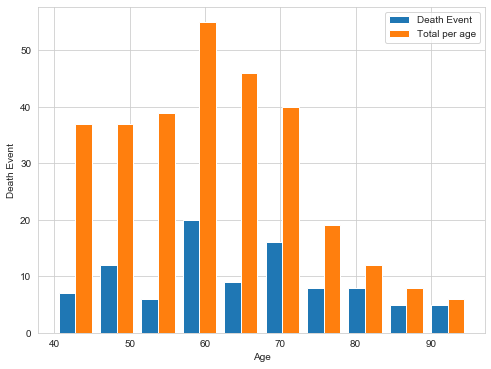

In [11]:
age_yes = raw_data[raw_data['DEATH_EVENT'] == 1].age
age = raw_data.age

plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Death Event')
plt.hist([age_yes, age], label=['Death Event', 'Total per age'])
plt.legend()

In [12]:
yes = raw_data[raw_data['DEATH_EVENT'] == 1]['DEATH_EVENT']
no = raw_data[raw_data['DEATH_EVENT'] == 0]['DEATH_EVENT']

print(len(no))
print(len(yes))

203
96


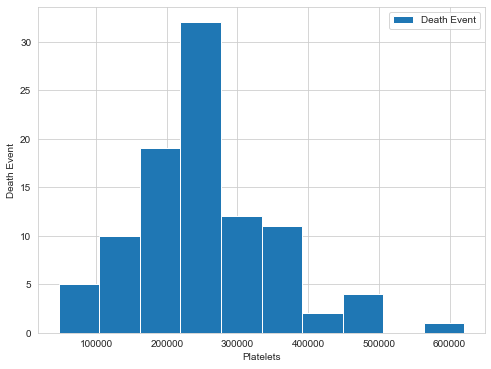

In [13]:
plat = raw_data[raw_data['DEATH_EVENT'] == 1].platelets

plt.figure(figsize=(8,6))
plt.xlabel('Platelets')
plt.ylabel('Death Event')
plt.hist(plat, label=['Death Event'])
plt.legend()

No handles with labels found to put in legend.


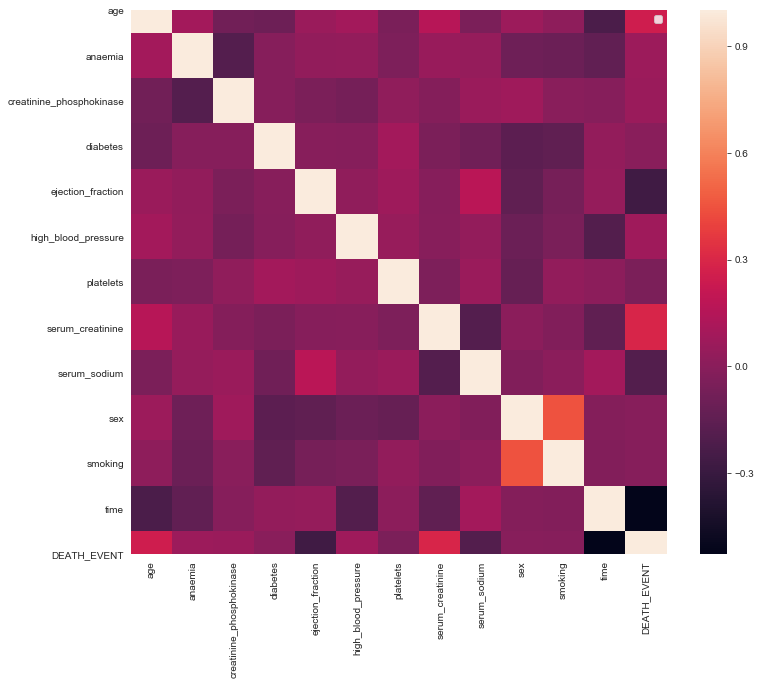

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(raw_data.corr())
plt.legend()

## Dealing with missing values

In [15]:
raw_data.info() 
raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

This dataset is very nice and doesn't need any manipulation to get rid of any null values, but it may require rescaling because some of the values are way too big!

## Dealing with small datasets

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb337498950>,
      dtype=object)

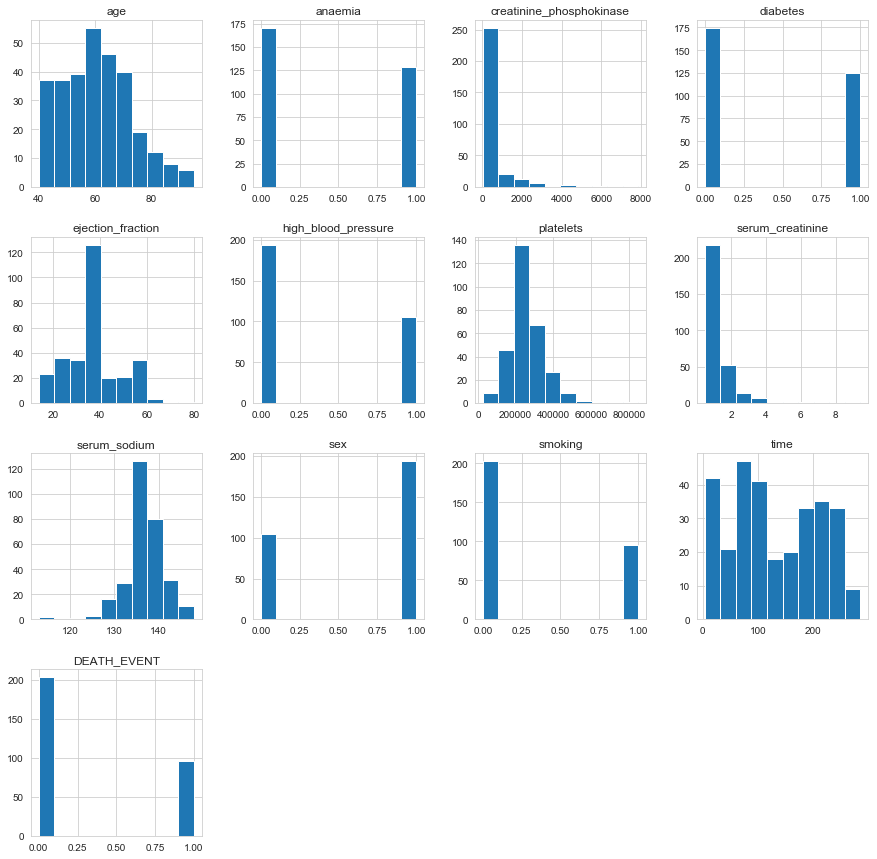

In [16]:
raw_data.hist(figsize=(15,15))

This dataset appears to be of appropriate size for the desired analysis although I recognize that having more data would always be better!

## Dealing with large, very large, and big datasets

Again this dataset is of sufficient size and it would just be that much better to have more data but we'll move forward with what we have!

##  Blending multiple datasets

I have only one data set and will be doing as much as I can with this dataset, there maybe other dataset but with medical data it can be difficult to sufficiently sterilize the data to maintain the confidential and private nature of individuals information.